<a href="https://colab.research.google.com/github/simrandhiman/PlantDiseaseProject/blob/master/DatasetCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Creating And Normalizing Dataset</h1>**

Downloading Dataset

In [1]:
 !git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 34.48 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


Copy main files dataset to /content/

In [2]:
 !cp -R /content/PlantVillage-Dataset/raw/ /content/

Visulize the Dataset

In [3]:
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from os import listdir
import random
import tqdm
import shutil

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[INFO] Loading Data 
Total Images : 54255
Mean of Images :1427.7631578947369
Standard Deviation :1255.1614371783023


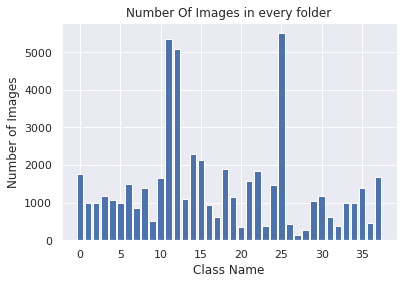

In [11]:
 
print("[INFO] Loading Data ")
root_dir = listdir('/content/raw/color/')
directory_root='/content/raw/color/'
sumP = 0
Y = []
 
 
j=0
for directory in root_dir :
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    Y.append (lenP)
    j=j+1
    #print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))
print("Mean of Images :" + str(sumP/len(listdir(directory_root))))
print("Standard Deviation :"+str(np.std(Y)))
 
#BarGraph
plt.bar(range(0,len(root_dir)),Y)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number Of Images in every folder")
plt.show()

Moving Random Images from Random folder in Test Folder

In [6]:
!mkdir Test

In [7]:
root_dir = listdir(directory_root)
print("Number Of Folders : " + str(len(root_dir)))

Number Of Folders : 38


In [8]:
 def TestFileFolderCreate() :   
    randomFolder = random.randint(0,len(root_dir)-1)
    folderName = root_dir[randomFolder]
    imageList = listdir(f"{directory_root}/{folderName}")
    randomImageNum = random.randint(0,len(imageList)-1)
    ImageName = imageList[randomImageNum]
    WriteFile(folderName,ImageName)
    src = f"{directory_root}/{folderName}/{ImageName}"
    des = '/content/Test/'
    shutil.move(src,des)
 
def WriteFile(ClassName,ImageName):
    f = open("TestFile.csv","a+")
    f.write(ClassName+"@#"+ImageName+"\n")

In [9]:
 for i in tqdm.tqdm(range(0,50),position=0):
    TestFileFolderCreate()

100%|██████████| 50/50 [00:00<00:00, 900.96it/s]


Creating zip file of Test Folder.

In [10]:
shutil.make_archive("TestActualFor","zip","/content/Test/")

'/content/TestActualFor.zip'

Balancing Dataset by deleteting imagefiles and make them near to Mean Images

In [12]:
import os
NumBalanced = int(input("Enter Number where you want images Nearby : \n[Recommended - 1200]"))
iterator = tqdm.tqdm(range(len(listdir(directory_root))),position=0)
def deleteFile(imageList,pathFolder):
    lengthOfImageList = len(imageList)
    randomFileNumber = random.sample(range(0, lengthOfImageList-50), (lengthOfImageList-NumBalanced))
    for j in randomFileNumber:
        path = pathFolder +"/"+ imageList[j]
        os.remove(path)
 
root = listdir(directory_root)
for i in iterator:
    if i==(len(root)):
        iterator.close()
    st = str(i)
    iterator.set_description(st)
    pathFolder = f"{directory_root}/{root[i]}"
    imagesTotal = len(listdir(pathFolder))
    if imagesTotal > NumBalanced:
        imagesList = listdir(pathFolder)
        deleteFile(imagesList,pathFolder)

Enter Number where you want images Nearby : 
[Recommended - 1200]1200


37: 100%|██████████| 38/38 [00:01<00:00, 30.80it/s]


[INFO] Loading Data 
Total Images : 35703
Mean of Images :939.5526315789474
Standard Deviation :332.6243888713246


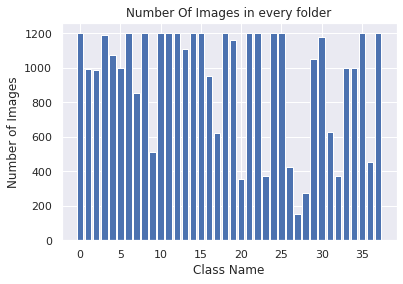

In [13]:
 
print("[INFO] Loading Data ")
root_dir = listdir('/content/raw/color/')
directory_root='/content/raw/color/'
sumP = 0
Y = []
 
 
j=0
for directory in root_dir :
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    Y.append (lenP)
    j=j+1
    #print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))
print("Mean of Images :" + str(sumP/len(listdir(directory_root))))
print("Standard Deviation :"+str(np.std(Y)))
 
#BarGraph
plt.bar(range(0,len(root_dir)),Y)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number Of Images in every folder")
plt.show()

Moving File for TestGenerator

For every clasa we are moving 18 to 20 images

In [14]:
!mkdir testGenerator

In [15]:
from os.path import isfile , isdir

In [16]:
 iterator = tqdm.tqdm(range(38),position=0)
 
folderlist = listdir(directory_root)
validPath = '/content/testGenerator'
for i in iterator:
    folderName = folderlist[i]
    os.mkdir(validPath+"/"+folderName)
    folderPath = f"{directory_root}/{folderName}"
    imageList = listdir(folderPath)
    totalImage = random.randint(18,20)
    for j in range(totalImage):
        iterator.set_description(str(j)+"/"+str(totalImage))
        imageRandom = random.randint(0,len(imageList)-1)
        image = imageList[imageRandom]
        imagePath = f"{directory_root}/{folderName}/{image}"
        if isfile(validPath+"/"+folderName+"/"+image):
            j = j-1
            continue
        else:
            src = imagePath
            desc = validPath+"/"+folderName+"/"+image
            shutil.move(src,desc)

17/18: 100%|██████████| 38/38 [00:01<00:00, 36.49it/s]


Augmentation

In [17]:
 import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A
from PIL import Image
import string
from skimage.io import imsave

In [22]:
 def Augmentation(imageP,SavePathFolder):
    image = cv2.imread(imageP, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    brightnessLimit = round(random.random() * 5) # 0-1 range x 5 ese hi eandom dala mne ok
    brightnessP = np.around(random.random(),decimals=2) ##probability  ok 
    rotateLimit = random.randint(0,360)
    rotateP = np.around(random.random(),decimals=1)
    verticalFlipP = np.around(random.random(),decimals=2)
    HorFlipP = np.around(random.random(),decimals=2)
    motionBP = np.around(random.random(),decimals=2)
    medianBP = np.around(random.random(),decimals=2)
    blurLim =  random.randint(3,5)
    blurL = random.randint(3,5)
    blurP = np.around(random.random(),decimals=2)
    ElasticTrasformAplhaLim = random.randint(50,255)
 
    transform = A.Compose([
    A.ToFloat(max_value=255.0),
    A.RandomBrightness(limit=brightnessLimit,p=brightnessP),
    A.RandomRotate90(),
    A.Rotate(limit=rotateLimit,p=rotateP),
    A.Flip(),
    A.VerticalFlip(p=verticalFlipP),
    A.HorizontalFlip(p=HorFlipP),       
    A.OneOf([
        A.MotionBlur(p=motionBP),
        A.MedianBlur(blur_limit=blurLim, p=medianBP),
        A.Blur(blur_limit=blurL, p=blurP),
    ], p=0.2),
    A.ElasticTransform(alpha=random.randint(50,255), sigma=random.randint(20,200), alpha_affine=random.randint(40,110), p=np.around(random.random(),decimals=2)),
    #A.RandomGamma(gamma_limit=random.randint(60,100), p=np.around(random.random(),decimals=2)),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=np.around(random.random(),decimals=1), rotate_limit=random.randint(30,50), p=np.around(random.random(),decimals=2)),
    A.OneOf([
        A.OpticalDistortion(p=np.around(random.random(), decimals=2)),
        A.GridDistortion(p=np.around(random.random(),decimals=2)),
    ], p=0.2),        
    A.HueSaturationValue(hue_shift_limit=random.randint(10,20), sat_shift_limit=np.around(random.random(),decimals=2), val_shift_limit=np.around(random.random(),decimals=2), p=np.around(random.random(),decimals=2)),
    A.FromFloat(max_value=255.0),
    ])
    augmented = transform(image=image)#yji to btara tha ,ki jo image hmne cv2 se imread kri , usko upar vale traform mae bheja okkokk
    img = cv2.convertScaleAbs(augmented['image']) #valies ko scale kra , 0 - 1 ke bixh mae 0-255 ko hnji
    letters = string.ascii_letters#ye imahe ka name bna rhe hai. ok ramdom name woth random abcd vageeaok
    result_str = ''.join(random.choice(letters) for i in range(10))
    #print('Image Name :'+str(result_str))
    imsave(SavePathFolder+"/"+result_str+".jpg",img)

Creating Images in every folder around 1200-1400

In [23]:
 import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [24]:
dir = listdir('/content/raw/color')
k=0
for imageFolder in dir:
    st = "[Folder] :"+str(k)
    folderPath = '/content/raw/color/'+imageFolder
    imagesTotal = len(listdir(folderPath))
    iterator = tqdm.tqdm(range(imagesTotal),position=0,desc=str(k))
    GeneratingImages = random.randint(1200,1400)
    requiredImages = GeneratingImages - imagesTotal
    RIPERimages = requiredImages
    if requiredImages <= 0:
        k+=1
        continue
    imagesList = listdir(folderPath)
    for i in iterator:
        if requiredImages<=0:
            iterator.update(imagesTotal)
            iterator.close()
            break
        image = imagesList[i]
        imagePath = folderPath+"/"+image
        perimageHowManyGenerate = (requiredImages//imagesTotal)+2
        destination = folderPath
        requiredImages = requiredImages-perimageHowManyGenerate
        st = str(round(((RIPERimages-requiredImages)/RIPERimages)*100))+" %"
        iterator.set_description(str(k)+" |" +st)
        if requiredImages <= 0:
            iterator.update(imagesTotal)
            iterator.close()
            break
        for i in range(0,perimageHowManyGenerate):
            Augmentation(imagePath,destination)
    k+=1

0 |102 %: : 1204it [00:04, 258.86it/s]                     
1 |100 %: : 1129it [00:32, 34.93it/s]                      
2 |100 %: : 1137it [00:34, 32.49it/s]                      
3 |101 %: : 1257it [00:18, 69.60it/s]                      
4 |100 %: : 1187it [00:28, 41.07it/s]                       
5 |100 %: : 1129it [00:31, 35.37it/s]                      
6 |100 %: : 1282it [00:23, 54.97it/s]                       
7 |100 %: : 1029it [00:41, 24.67it/s]                      
8 |100 %: : 1247it [00:13, 95.23it/s]                      
9 |100 %: : 830it [01:23,  9.93it/s]                       
10 |100 %: : 1281it [00:20, 63.96it/s]                       
11 |100 %: : 1208it [00:07, 164.14it/s]                     
12 |101 %: : 1220it [00:08, 145.96it/s]                     
13 |100 %: : 1204it [00:23, 51.36it/s]                       
14 |100 %: : 1259it [00:14, 83.95it/s]                      
15 |101 %: : 1224it [00:09, 124.97it/s]                     
16 |100 %: : 1105it [00:35, 31

Data Visualization After Augmentation

[INFO] Loading Data 
Total Images : 49035
Mean of Images :1290.3947368421052
Standard Deviation :76.05591415243344


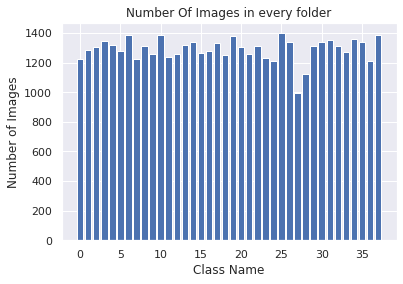

In [26]:
 
print("[INFO] Loading Data ")
root_dir = listdir('/content/raw/color/')
directory_root='/content/raw/color/'
sumP = 0
Y = []
 
 
j=0
for directory in root_dir :
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    Y.append (lenP)
    j=j+1
    #print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))
print("Mean of Images :" + str(sumP/len(listdir(directory_root))))
print("Standard Deviation :"+str(np.std(Y)))
 
#BarGraph
plt.bar(range(0,len(root_dir)),Y)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number Of Images in every folder")
plt.show()

Creating Zip Files

In [27]:
shutil.make_archive("TestGenerator","zip","/content/testGenerator/")

'/content/TestGenerator.zip'

In [28]:
shutil.make_archive("DatasetNew","zip","/content/raw/color/")

'/content/DatasetNew.zip'